# Load The Libraries

In [ ]:
import pandas as pd
import numpy as np

# Load the Data

In [ ]:
df = pd.read_csv(r'INR_EXCHANGE_MULTIVARIATE_DATA.csv',index_col = 'Date')

In [ ]:
df.head(5)

,INR=X_Open,INR=X_Close,INR=X_High,INR=X_Low,^IRX,^FVX,^TNX,^TYX,DX-Y.NYB,GC=F,SI=F,BZ=F,^BSESN,^IXIC,India_3M_BOY,India_6M_BOY,India_1Y_BOY,India_5Y_BOY,India_10Y_BOY,Day
Date,,,,,,,,,,,,,,,,,,,,
2009-01-02,48.064999,48.244999,49.075001,48.064999,0.085,1.727,2.416,2.815,81.839996,878.799988,11.465,46.910000,9958.219727,1632.209961,4.20,4.25,4.566,5.133,5.349,4
2009-01-03,48.064999,48.244999,49.075001,48.064999,0.085,1.727,2.416,2.815,81.839996,878.799988,11.465,46.910000,9958.219727,1632.209961,4.20,4.25,4.566,5.133,5.349,5
2009-01-04,48.064999,48.244999,49.075001,48.064999,0.085,1.727,2.416,2.815,81.839996,878.799988,11.465,46.910000,9958.219727,1632.209961,4.20,4.25,4.566,5.133,5.349,6
2009-01-05,48.799999,48.229000,48.799999,48.195999,0.085,1.694,2.488,3.040,82.639999,857.200012,11.245,49.619999,10275.599609,1628.030029,4.25,4.30,4.479,5.225,5.172,0
2009-01-06,48.500000,48.505001,48.759998,48.450001,0.130,1.704,2.505,3.069,82.849998,865.400024,11.420,50.529999,10335.929688,1652.380005,4.30,4.35,4.444,5.306,5.293,1


Derived Attributes

In [ ]:
df['High_Low_Difference'] = df['INR=X_High'] - df['INR=X_Low']

# De-Trending the data

In [ ]:
df['Diff_INR_Close'] = df['INR=X_Close'].diff()

In [ ]:
differenced = df[1:]

In [ ]:
df.head()

,INR=X_Open,INR=X_Close,INR=X_High,INR=X_Low,^IRX,^FVX,^TNX,^TYX,DX-Y.NYB,GC=F,...,^BSESN,^IXIC,India_3M_BOY,India_6M_BOY,India_1Y_BOY,India_5Y_BOY,India_10Y_BOY,Day,High_Low_Difference,Diff_INR_Close
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,48.064999,48.244999,49.075001,48.064999,0.085,1.727,2.416,2.815,81.839996,878.799988,...,9958.219727,1632.209961,4.20,4.25,4.566,5.133,5.349,4,1.010002,NaN
2009-01-03,48.064999,48.244999,49.075001,48.064999,0.085,1.727,2.416,2.815,81.839996,878.799988,...,9958.219727,1632.209961,4.20,4.25,4.566,5.133,5.349,5,1.010002,0.000000
2009-01-04,48.064999,48.244999,49.075001,48.064999,0.085,1.727,2.416,2.815,81.839996,878.799988,...,9958.219727,1632.209961,4.20,4.25,4.566,5.133,5.349,6,1.010002,0.000000
2009-01-05,48.799999,48.229000,48.799999,48.195999,0.085,1.694,2.488,3.040,82.639999,857.200012,...,10275.599609,1628.030029,4.25,4.30,4.479,5.225,5.172,0,0.604000,-0.015999
2009-01-06,48.500000,48.505001,48.759998,48.450001,0.130,1.704,2.505,3.069,82.849998,865.400024,...,10335.929688,1652.380005,4.30,4.35,4.444,5.306,5.293,1,0.309998,0.276001


# Scaling the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(differenced)
Y_data = Y_scaler.fit_transform(differenced[['Diff_INR_Close']])

In [ ]:
X_data1 = differenced.values
Y_data1 = differenced[['INR=X_Close']].values

# Generate Training Data

In [ ]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon, exclude_weekends = True, scaled=True):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indices = range(i-window, i)
        if not exclude_weekends:
            X.append(dataset[indices])
            indicey = range(i, i+horizon)
            y.append(target[indicey])
        else:
            if (dataset[indices][:,-1][-1] < 0.6 or dataset[indices][:,-1][-1] > 0.9) and scaled:
                X.append(dataset[indices])
                indicey = range(i, i+horizon)
                y.append(target[indicey])
            if (dataset[indices][:,-1][-1] <4  or dataset[indices][:,-1][-1] >5) and not scaled:
                X.append(dataset[indices])
                indicey = range(i, i+horizon)
                y.append(target[indicey])
    return np.array(X), np.array(y) 

In [ ]:
hist_window = 20
horizon = 10
TRAIN_SPLIT = 3000
X_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon, exclude_weekends = False, scaled=True)
X_val, y_val = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon, exclude_weekends = False, scaled=True)

X_train_v, y_train_v = custom_ts_multi_data_prep(X_data1, Y_data1, 0, TRAIN_SPLIT, hist_window, horizon, exclude_weekends = False, scaled=False)
X_val_v, y_val_v = custom_ts_multi_data_prep(X_data1, Y_data1, TRAIN_SPLIT, None, hist_window, horizon, exclude_weekends = False, scaled=False)

In [ ]:
X_train.shape, X_train_v.shape

((2980, 20, 22), (2980, 20, 22))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dropout
import tensorflow as tf

In [ ]:
lstm_model = Sequential()
lstm_model.add(GRU(64, input_shape=X_train.shape[-2:], return_sequences=True))
lstm_model.add(LSTM(256))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(units=horizon))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 20, 64)            15168     
                                                                 
 lstm_3 (LSTM)               (None, 256)               328704    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 360,970
Trainable params: 360,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_path = 'GRU_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min')
callbacks=[early_stopings,checkpoint] 
history = lstm_model.fit(X_train,y_train,epochs=50,validation_data=[X_val, y_val],callbacks=callbacks,batch_size = 64)

Epoch 1/50
47/47 [==============================] - 12s 154ms/step - loss: 0.0182 - val_loss: 0.0041
Epoch 2/50
47/47 [==============================] - 6s 136ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 3/50
47/47 [==============================] - 6s 136ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4/50
47/47 [==============================] - 6s 137ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/50
47/47 [==============================] - 6s 137ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 6/50
47/47 [==============================] - 7s 147ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 7/50
47/47 [==============================] - 6s 135ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 8/50
47/47 [==============================] - 6s 138ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 9/50
47/47 [==============================] - 6s 137ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/50
47/47 [==============================] - 7s 146ms/step - loss: 0.0019 - val_loss: 0.002

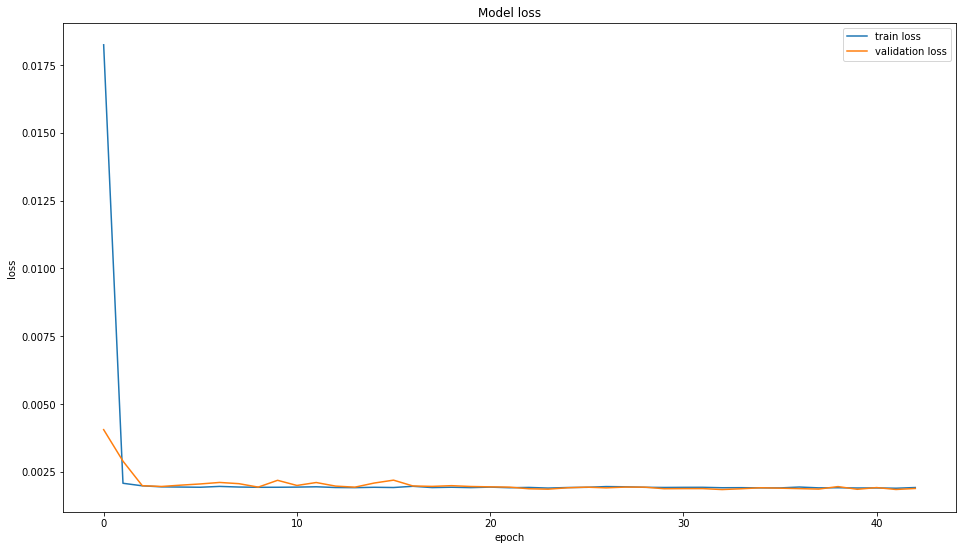

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show() 

# Re-Trending the Prediction Data

In [ ]:
pred = Y_scaler.inverse_transform(lstm_model.predict(X_val))

28/28 [==============================] - 2s 27ms/step


In [ ]:
#Re-Scaling y_val
y_val_r = Y_scaler.inverse_transform(y_val.reshape(y_val.shape[:2]))

In [ ]:
def re_trend(undiff_X,diff_y,target_col = 1):
    import numpy as np
    X_val_v = undiff_X
    y_val = diff_y
    y_out = []
    for i in range(len(X_val_v)):
        y_convert = [X_val_v[i,:,0][-1]]
        for y in y_val[i]:
            y_convert.append(y_convert[-1] + y)
        y_out.append(y_convert[1:])
    return np.array(y_out)

In [ ]:
#Re-Trending
pred = re_trend(X_val_v,pred,target_col = 1)

In [ ]:
 pred

array([[64.30348675, 64.34476381, 64.32628877, ..., 64.41460976,
        64.44386971, 64.4273446 ],
       [64.61794152, 64.65291095, 64.63340302, ..., 64.74973453,
        64.7702102 , 64.75393327],
       [64.66844604, 64.70357574, 64.68850382, ..., 64.83009438,
        64.84803937, 64.83666852],
       ...,
       [72.0842018 , 72.06639469, 72.02667038, ..., 71.95631104,
        71.93218167, 71.8839679 ],
       [71.84675936, 71.82694292, 71.79035003, ..., 71.73761809,
        71.71182048, 71.66724283],
       [71.54107722, 71.51658622, 71.4764133 , ..., 71.40408441,
        71.37717822, 71.33103023]])

# Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

df_out_mape = pd.DataFrame()

Truth = y_val_v
Predictions = pred

rmse = []
mape = []
for i in range(10):
    #Print MSE to see how good the model is
    Error = mean_squared_error(Truth[:,i], Predictions[:,i])
    rmse.append(Error**0.5)

    MAPE = mean_absolute_percentage_error(Truth[:,i], Predictions[:,i])
    mape.append(MAPE)

df_out_mape['MAPE'] = mape
df_out_mape['RMSE'] = rmse

NameError: ignored

In [ ]:
df_out_mape

,MAPE,RMSE
0,0.002482,0.264326
1,0.003546,0.343521
2,0.004283,0.408288
3,0.004830,0.459900
4,0.005522,0.495014
5,0.006276,0.535775
6,0.006619,0.571671
7,0.006971,0.624909
8,0.007462,0.664080
9,0.007923,0.706805


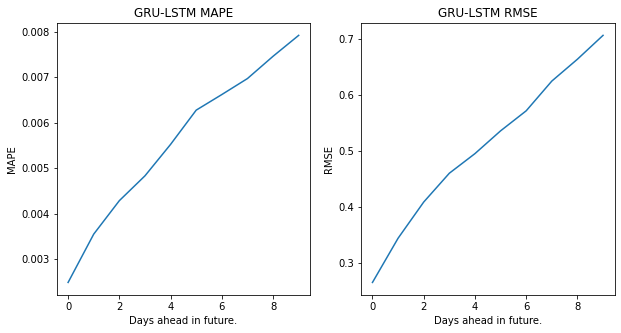

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('GRU-LSTM MAPE')
plt.plot(df_out_mape['MAPE'])
plt.xlabel('Days ahead in future.')
plt.ylabel('MAPE')
plt.subplot(1,2,2)
plt.title('GRU-LSTM RMSE')
plt.plot(df_out_mape['RMSE'])
plt.xlabel('Days ahead in future.')
plt.ylabel('RMSE')
plt.show()

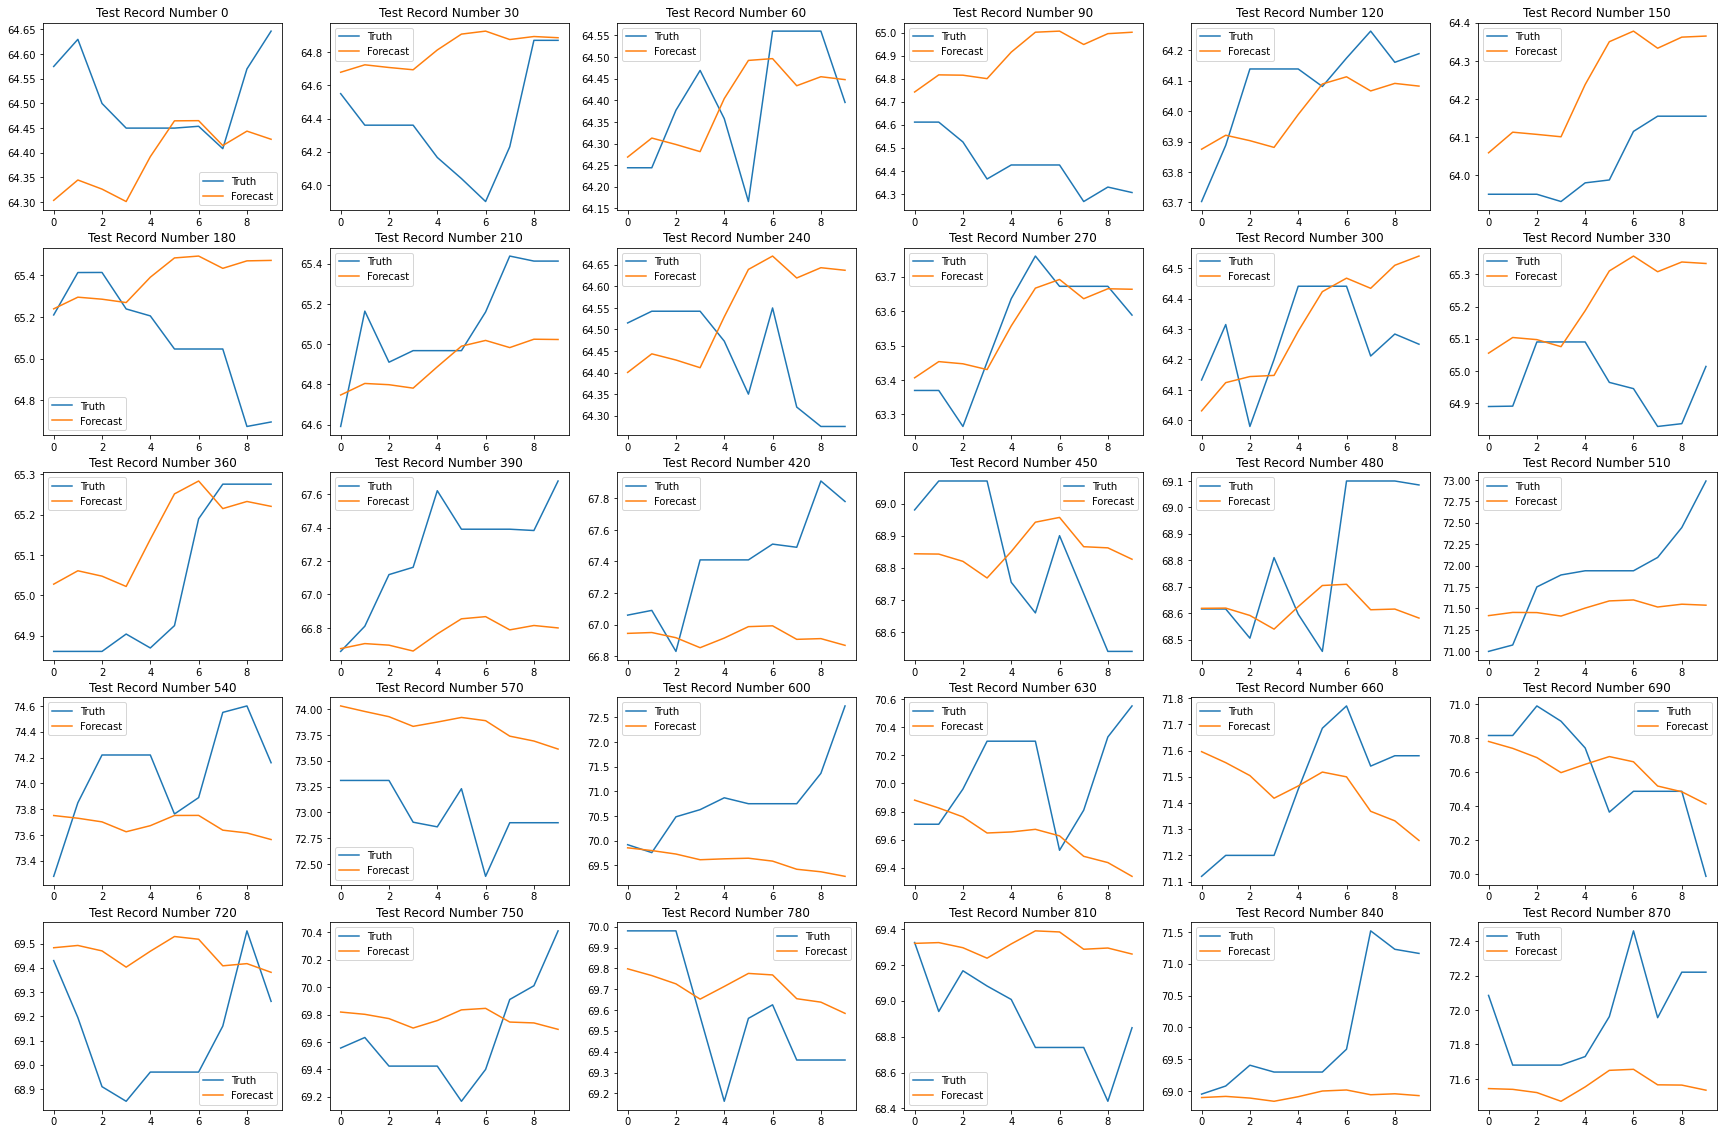

In [ ]:
plt.figure(figsize=(30,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title('Test Record Number '+str(30*i))
    plt.plot(Truth[30*i],label='Truth')
    plt.plot(Predictions[30*i],label='Forecast')
    plt.legend()

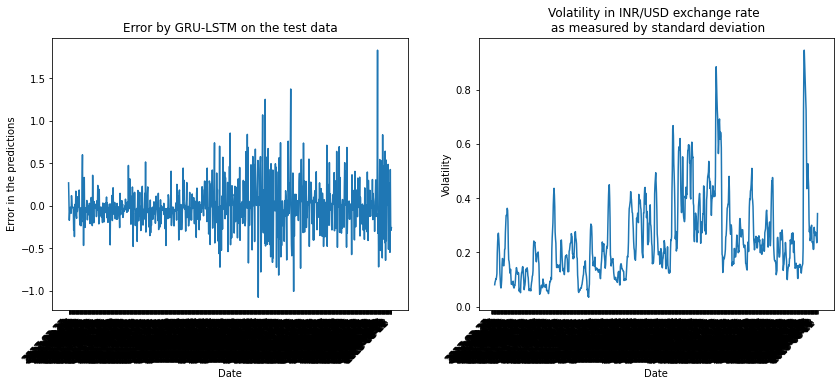

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df[3000:].index[:len(Truth[:,0,0])],Truth[:,0,0]- Predictions[:,0])
plt.xlabel('Date')
plt.ylabel('Error in the predictions')
plt.title('Error by GRU-LSTM on the test data')
plt.xticks(rotation=45, ha='right')

# Rolling Volatility 
plt.subplot(1,2,2)
import pandas as pd 
price_list=pd.Series(Truth[:,0,0]) 
var=10 
rollist=price_list.rolling(var) 
rolvol=rollist.std(ddof=0) 
plt.plot(df[3000:].index[:len(Truth[:,0,0])],rolvol) 
plt.title('Volatility in INR/USD exchange rate \n as measured by standard deviation') 
plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show() 

Feature Importance

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)


for exp in range(1):
  performance_MAPE = pd.DataFrame()
  performance_RMSE = pd.DataFrame()

  df['High_Low_Difference'] = df['INR=X_High'] - df['INR=X_Low']
  df['Diff_INR_Close'] = df['INR=X_Close'].diff()

  columns = ['^IRX', '^FVX', '^TNX', '^TYX', 'DX-Y.NYB', 'GC=F', 'SI=F', 'BZ=F', '^BSESN', '^IXIC',
        'India_3M_BOY', 'India_6M_BOY', 'India_1Y_BOY', 'India_5Y_BOY', 'India_10Y_BOY', 'Day','High_Low_Difference']
  columns = ['']
  must = ['INR=X_Close','Diff_INR_Close']

  for col in columns:
      
      use_cols = must + [col]
      if col == '':
        col = 'STANDARD'
        use_cols = must
      print('Using', col)
      differenced = df[use_cols][1:]
      
      from sklearn.preprocessing import MinMaxScaler
      X_scaler = MinMaxScaler()
      Y_scaler = MinMaxScaler()
      X_data = X_scaler.fit_transform(differenced)
      Y_data = Y_scaler.fit_transform(differenced[['Diff_INR_Close']])
      
      X_data1 = differenced.values
      Y_data1 = differenced[['INR=X_Close']].values
      
      def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon, exclude_weekends = True, scaled=True):
          X = []
          y = []
          start = start + window
          if end is None:
              end = len(dataset) - horizon
          for i in range(start, end):
              indices = range(i-window, i)
              if not exclude_weekends:
                  X.append(dataset[indices])
                  indicey = range(i, i+horizon)
                  y.append(target[indicey])
              else:
                  if (dataset[indices][:,-1][-1] < 0.6 or dataset[indices][:,-1][-1] > 0.9) and scaled:
                      X.append(dataset[indices])
                      indicey = range(i, i+horizon)
                      y.append(target[indicey])
                  if (dataset[indices][:,-1][-1] <4  or dataset[indices][:,-1][-1] >5) and not scaled:
                      X.append(dataset[indices])
                      indicey = range(i, i+horizon)
                      y.append(target[indicey])
          return np.array(X), np.array(y) 
      
      hist_window = 20
      horizon = 10
      TRAIN_SPLIT = 3000
      X_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon, exclude_weekends = False, scaled=True)
      X_val, y_val = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon, exclude_weekends = False, scaled=True)

      X_train_v, y_train_v = custom_ts_multi_data_prep(X_data1, Y_data1, 0, TRAIN_SPLIT, hist_window, horizon, exclude_weekends = False, scaled=False)
      X_val_v, y_val_v = custom_ts_multi_data_prep(X_data1, Y_data1, TRAIN_SPLIT, None, hist_window, horizon, exclude_weekends = False, scaled=False)
      
      from tensorflow.keras.models import Sequential
      from tensorflow.keras.layers import Dense
      from tensorflow.keras.layers import LSTM, GRU
      from tensorflow.keras.layers import Dropout
      import tensorflow as tf
      
      lstm_model = Sequential()
      lstm_model.add(GRU(64, input_shape=X_train.shape[-2:], return_sequences=True))
      lstm_model.add(LSTM(256))
      lstm_model.add(Dense(64, activation='relu'))
      lstm_model.add(Dense(units=horizon))
      lstm_model.compile(optimizer='adam', loss='mse')
      #lstm_model.summary()
      
      model_path = 'GRU_LSTM_Multivariate.h5'
      early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='min')
      checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min')
      callbacks=[early_stopings,checkpoint] 
      history = lstm_model.fit(X_train,y_train,epochs=50,validation_data=[X_val, y_val],callbacks=callbacks,batch_size = 64,verbose=0)
      
      pred = Y_scaler.inverse_transform(lstm_model.predict(X_val))
      
      #Re-Scaling y_val
      y_val_r = Y_scaler.inverse_transform(y_val.reshape(y_val.shape[:2]))
      
      def re_trend(undiff_X,diff_y,target_col = 1):
          import numpy as np
          X_val_v = undiff_X
          y_val = diff_y
          y_out = []
          for i in range(len(X_val_v)):
              y_convert = [X_val_v[i,:,0][-1]]
              for y in y_val[i]:
                  y_convert.append(y_convert[-1] + y)
              y_out.append(y_convert[1:])
          return np.array(y_out)

      #Re-Trending
      pred = re_trend(X_val_v,pred,target_col = 1)
      
      from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

      df_out_mape = pd.DataFrame()

      Truth = y_val_v
      Predictions = pred

      rmse = []
      mape = []
      for i in range(10):
          #Print MSE to see how good the model is
          Error = mean_squared_error(Truth[:,i], Predictions[:,i])
          rmse.append(Error**0.5)

          MAPE = mean_absolute_percentage_error(Truth[:,i], Predictions[:,i])
          mape.append(MAPE)

      #df_out_mape[col] = mape
      #df_out_rmse[col] = rmse
      
      performance_MAPE[col] = mape
      performance_RMSE[col] = rmse

      #performance[col] = df_out_mape

      #print(df_out_mape)

  performance_MAPE.to_csv('MAPE_Improvement_exp_'+str(exp)+'.csv',index=False)
  performance_RMSE.to_csv('RMSE_Improvement_exp_'+str(exp)+'.csv',index=False)


Using STANDARD
28/28 [==============================] - 2s 28ms/step


XG_Boost Feature Extraction

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[20:18:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Days Ahead : 0


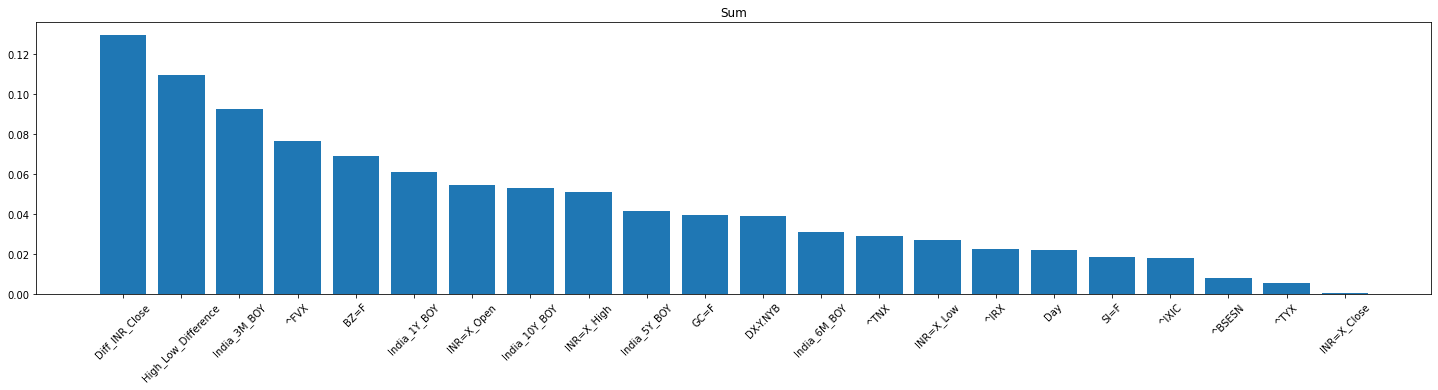

[20:18:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Days Ahead : 1


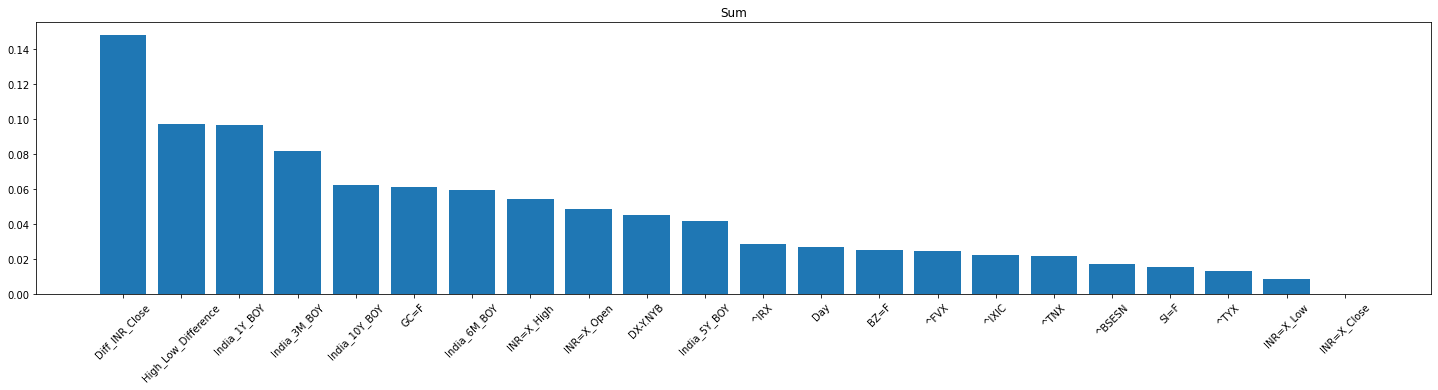

[20:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Days Ahead : 2


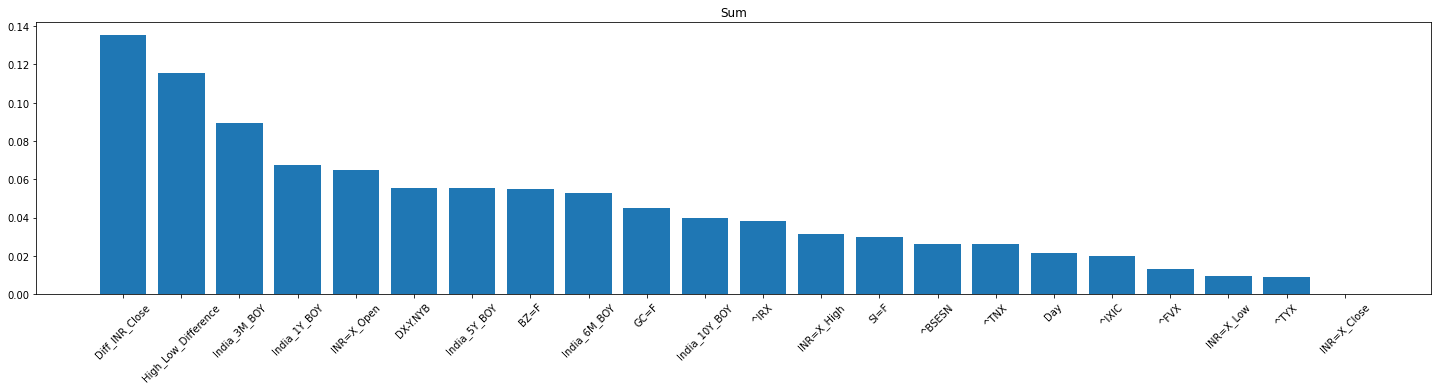

[20:18:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Days Ahead : 3


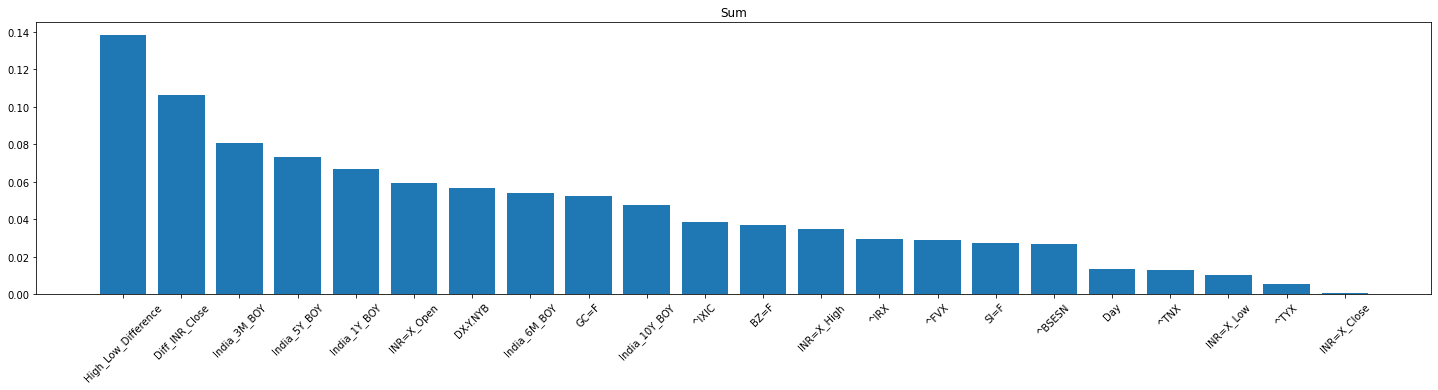

[20:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Days Ahead : 4


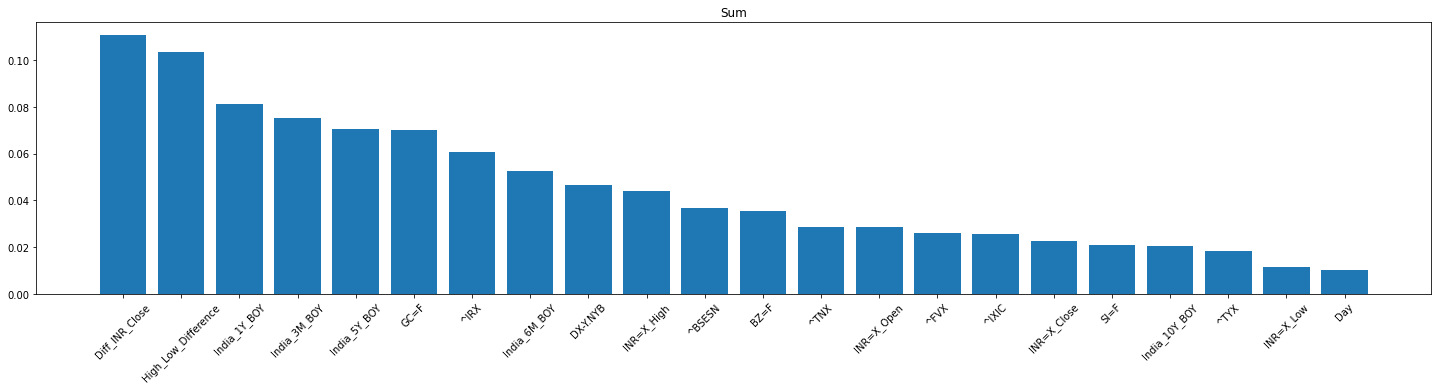

[20:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Days Ahead : 5


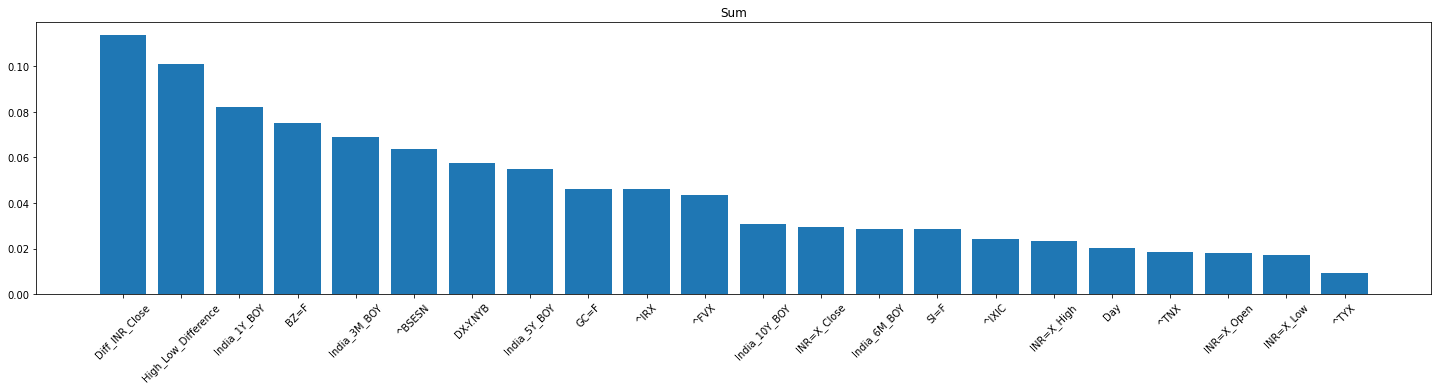

[20:19:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Days Ahead : 6


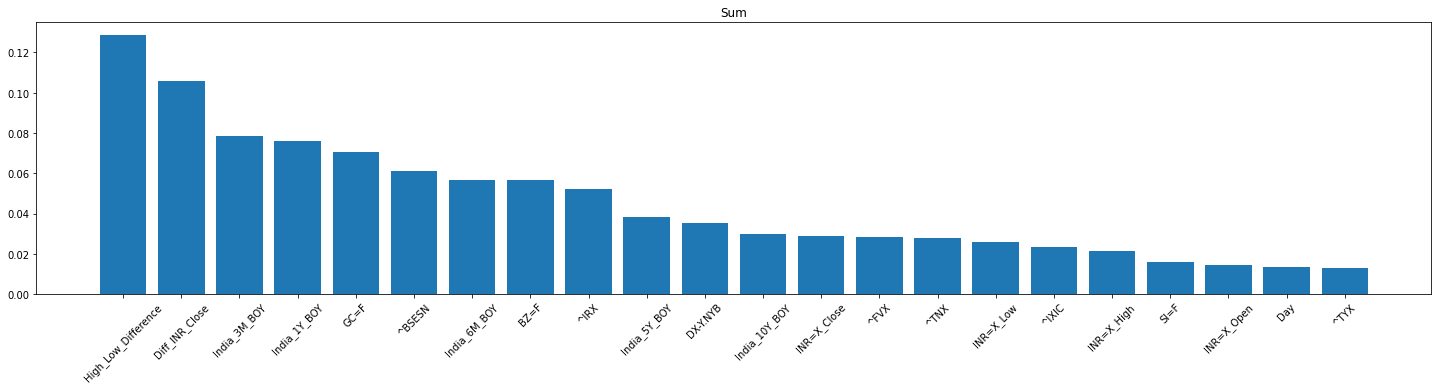

[20:19:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Days Ahead : 7


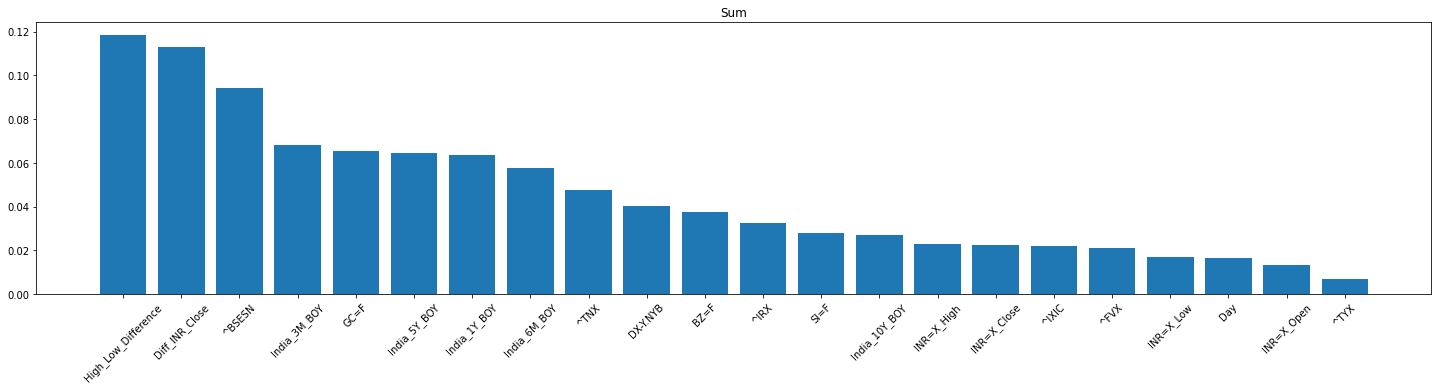

[20:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Days Ahead : 8


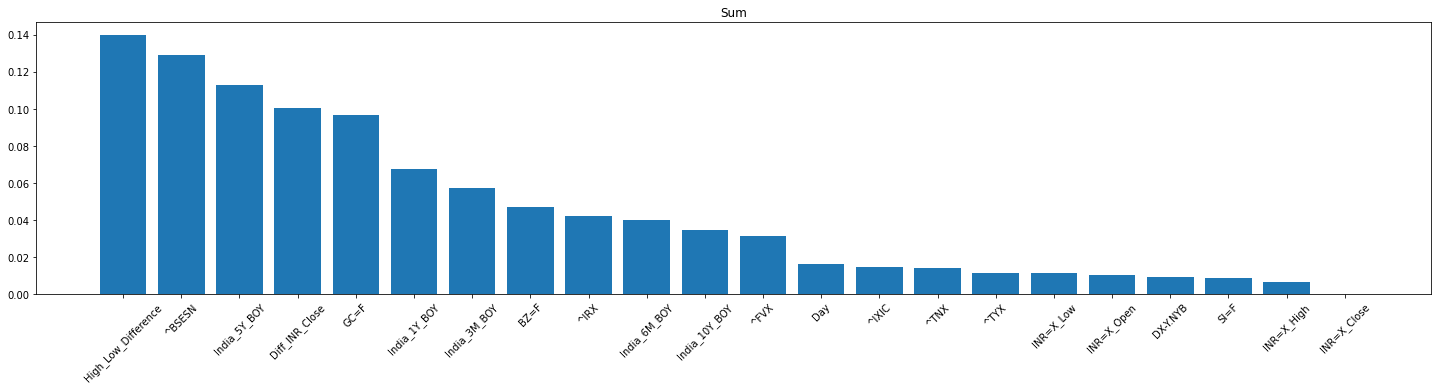

[20:19:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Days Ahead : 9


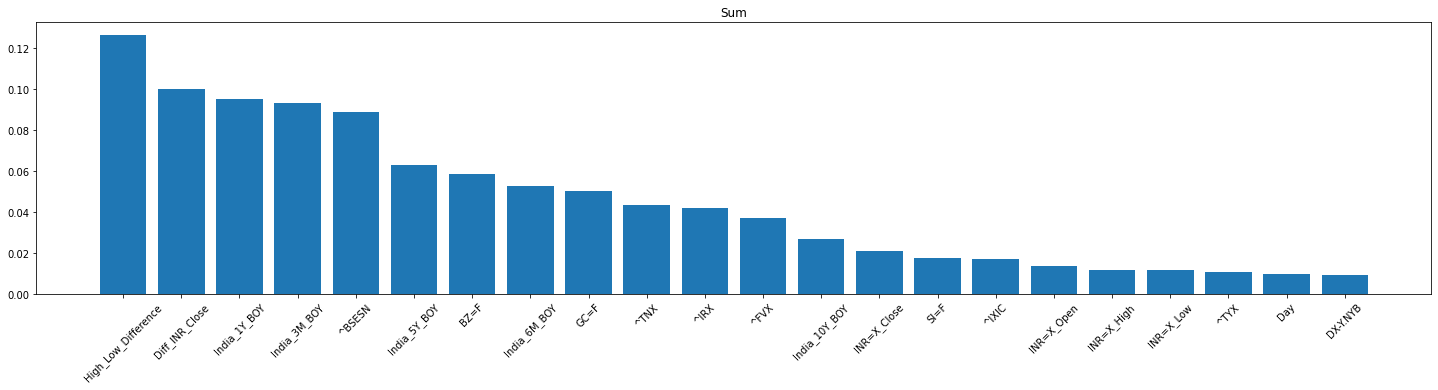

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(differenced)
Y_data = Y_scaler.fit_transform(differenced[['Diff_INR_Close']])

X_data1 = differenced.values
Y_data1 = differenced[['INR=X_Close']].values

def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon, exclude_weekends = True, scaled=True):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indices = range(i-window, i)
        if not exclude_weekends:
            X.append(dataset[indices])
            indicey = range(i, i+horizon)
            y.append(target[indicey])
        else:
            if (dataset[indices][:,-1][-1] < 0.6 or dataset[indices][:,-1][-1] > 0.9) and scaled:
                X.append(dataset[indices])
                indicey = range(i, i+horizon)
                y.append(target[indicey])
            if (dataset[indices][:,-1][-1] <4  or dataset[indices][:,-1][-1] >5) and not scaled:
                X.append(dataset[indices])
                indicey = range(i, i+horizon)
                y.append(target[indicey])
    return np.array(X), np.array(y) 

hist_window = 20
horizon = 10
TRAIN_SPLIT = 3000
X_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon, exclude_weekends = False, scaled=True)
X_val, y_val = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon, exclude_weekends = False, scaled=True)

X_train_v, y_train_v = custom_ts_multi_data_prep(X_data1, Y_data1, 0, TRAIN_SPLIT, hist_window, horizon, exclude_weekends = False, scaled=False)
X_val_v, y_val_v = custom_ts_multi_data_prep(X_data1, Y_data1, TRAIN_SPLIT, None, hist_window, horizon, exclude_weekends = False, scaled=False)


day_cols = []
for days_ahead in range(y_train.shape[1]):
    d = days_ahead
    X = []
    for i in range(X_train.shape[0]):
        X.append(np.concatenate([X_train[i][:,j] for j in range(X_train.shape[-1])]))
    X = np.array(X)
    
    import xgboost as xg
    xgb_r = xg.XGBRegressor(seed=42,importance_type='weight')
    xgb_r.fit(X, y_train[:,d])
    
    f_imp_sum = []
    f_imp_mean = []
    for i in range(X_train.shape[-1]):
        f_imp_sum.append([df.columns[i],xgb_r.feature_importances_[i*X_train.shape[-2]:(i+1)*X_train.shape[-2]].sum()])
        f_imp_mean.append([df.columns[i],xgb_r.feature_importances_[i*X_train.shape[-2]:(i+1)*X_train.shape[-2]].mean()])
    print('Days Ahead :',d)
    f_imp_sum.sort(key=lambda x:-x[1])
    f_imp_mean.sort(key=lambda x:-x[1])
    plt.figure(figsize=(25,5))
    plt.title('Sum')
    plt.xticks(rotation = 45)
    plt.bar(np.array(f_imp_sum)[:,0],np.array(f_imp_sum)[:,1].astype(np.float64))
    plt.show()

    day_cols.append(['INR=X_Close','Diff_INR_Close']+list(set(list(set(np.array(f_imp_sum)[:,0][:10])))-{'Diff_INR_Close','INR=X_Close'}))

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)


for exp in range(1):
  performance_MAPE = pd.DataFrame()
  performance_RMSE = pd.DataFrame()

  df['High_Low_Difference'] = df['INR=X_High'] - df['INR=X_Low']
  df['Diff_INR_Close'] = df['INR=X_Close'].diff()

  columns = ['^IRX', '^FVX', '^TNX', '^TYX', 'DX-Y.NYB', 'GC=F', 'SI=F', 'BZ=F', '^BSESN', '^IXIC',
        'India_3M_BOY', 'India_6M_BOY', 'India_1Y_BOY', 'India_5Y_BOY', 'India_10Y_BOY', 'Day','High_Low_Difference']
  columns = ['']
  must = ['INR=X_Close','Diff_INR_Close']

  for day in range(10):
      print('Running : ',day)
      use_cols = day_cols[day]
      differenced = df[use_cols][1:]
      
      from sklearn.preprocessing import MinMaxScaler
      X_scaler = MinMaxScaler()
      Y_scaler = MinMaxScaler()
      X_data = X_scaler.fit_transform(differenced)
      Y_data = Y_scaler.fit_transform(differenced[['Diff_INR_Close']])
      
      X_data1 = differenced.values
      Y_data1 = differenced[['INR=X_Close']].values
      
      def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon, exclude_weekends = True, scaled=True):
          X = []
          y = []
          start = start + window
          if end is None:
              end = len(dataset) - horizon
          for i in range(start, end):
              indices = range(i-window, i)
              if not exclude_weekends:
                  X.append(dataset[indices])
                  indicey = range(i, i+horizon)
                  y.append(target[indicey])
              else:
                  if (dataset[indices][:,-1][-1] < 0.6 or dataset[indices][:,-1][-1] > 0.9) and scaled:
                      X.append(dataset[indices])
                      indicey = range(i, i+horizon)
                      y.append(target[indicey])
                  if (dataset[indices][:,-1][-1] <4  or dataset[indices][:,-1][-1] >5) and not scaled:
                      X.append(dataset[indices])
                      indicey = range(i, i+horizon)
                      y.append(target[indicey])
          return np.array(X), np.array(y) 
      
      hist_window = 12
      horizon = 5
      TRAIN_SPLIT = 3000
      X_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon, exclude_weekends = False, scaled=True)
      X_val, y_val = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon, exclude_weekends = False, scaled=True)

      X_train_v, y_train_v = custom_ts_multi_data_prep(X_data1, Y_data1, 0, TRAIN_SPLIT, hist_window, horizon, exclude_weekends = False, scaled=False)
      X_val_v, y_val_v = custom_ts_multi_data_prep(X_data1, Y_data1, TRAIN_SPLIT, None, hist_window, horizon, exclude_weekends = False, scaled=False)
      
      from tensorflow.keras.models import Sequential
      from tensorflow.keras.layers import Dense
      from tensorflow.keras.layers import LSTM, GRU
      from tensorflow.keras.layers import Dropout
      import tensorflow as tf
      
      lstm_model = Sequential()
      lstm_model.add(GRU(64, input_shape=X_train.shape[-2:], return_sequences=True))
      lstm_model.add(LSTM(256))
      lstm_model.add(Dense(64, activation='relu'))
      lstm_model.add(Dense(units=horizon))
      lstm_model.compile(optimizer='adam', loss='mse')
      #lstm_model.summary()
      
      model_path = 'GRU_LSTM_Multivariate.h5'
      early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='min')
      checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min')
      callbacks=[early_stopings,checkpoint] 
      history = lstm_model.fit(X_train,y_train,epochs=50,validation_data=[X_val, y_val],callbacks=callbacks,batch_size = 64,verbose=0)
      
      pred = Y_scaler.inverse_transform(lstm_model.predict(X_val))
      
      #Re-Scaling y_val
      y_val_r = Y_scaler.inverse_transform(y_val.reshape(y_val.shape[:2]))
      
      def re_trend(undiff_X,diff_y,target_col = 1):
          import numpy as np
          X_val_v = undiff_X
          y_val = diff_y
          y_out = []
          for i in range(len(X_val_v)):
              y_convert = [X_val_v[i,:,0][-1]]
              for y in y_val[i]:
                  y_convert.append(y_convert[-1] + y)
              y_out.append(y_convert[1:])
          return np.array(y_out)

      #Re-Trending
      pred = re_trend(X_val_v,pred,target_col = 1)
      
      from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

      df_out_mape = pd.DataFrame()

      Truth = y_val_v
      Predictions = pred

      rmse = []
      mape = []
      for i in range(5):
          #Print MSE to see how good the model is
          Error = mean_squared_error(Truth[:,i], Predictions[:,i])
          rmse.append(Error**0.5)

          MAPE = mean_absolute_percentage_error(Truth[:,i], Predictions[:,i])
          mape.append(MAPE)

      #df_out_mape[col] = mape
      #df_out_rmse[col] = rmse
      
      performance_MAPE[str(day)] = mape
      performance_RMSE[str(day)] = rmse
      print(mape)
      #performance[col] = df_out_mape

      #print(df_out_mape)

  performance_MAPE.to_csv('MAPE_Improvement_exp_XGB_LSTM'+'.csv',index=False)
  performance_RMSE.to_csv('RMSE_Improvement_exp_XGB_LSTM'+'.csv',index=False)


Running :  0
29/29 [==============================] - 1s 15ms/step


IndexError: ignored

In [ ]:
mape

[0.002441384994609834,
 0.003688924799695858,
 0.0043033367495024216,
 0.0048829858557802135,
 0.005396834543928366]

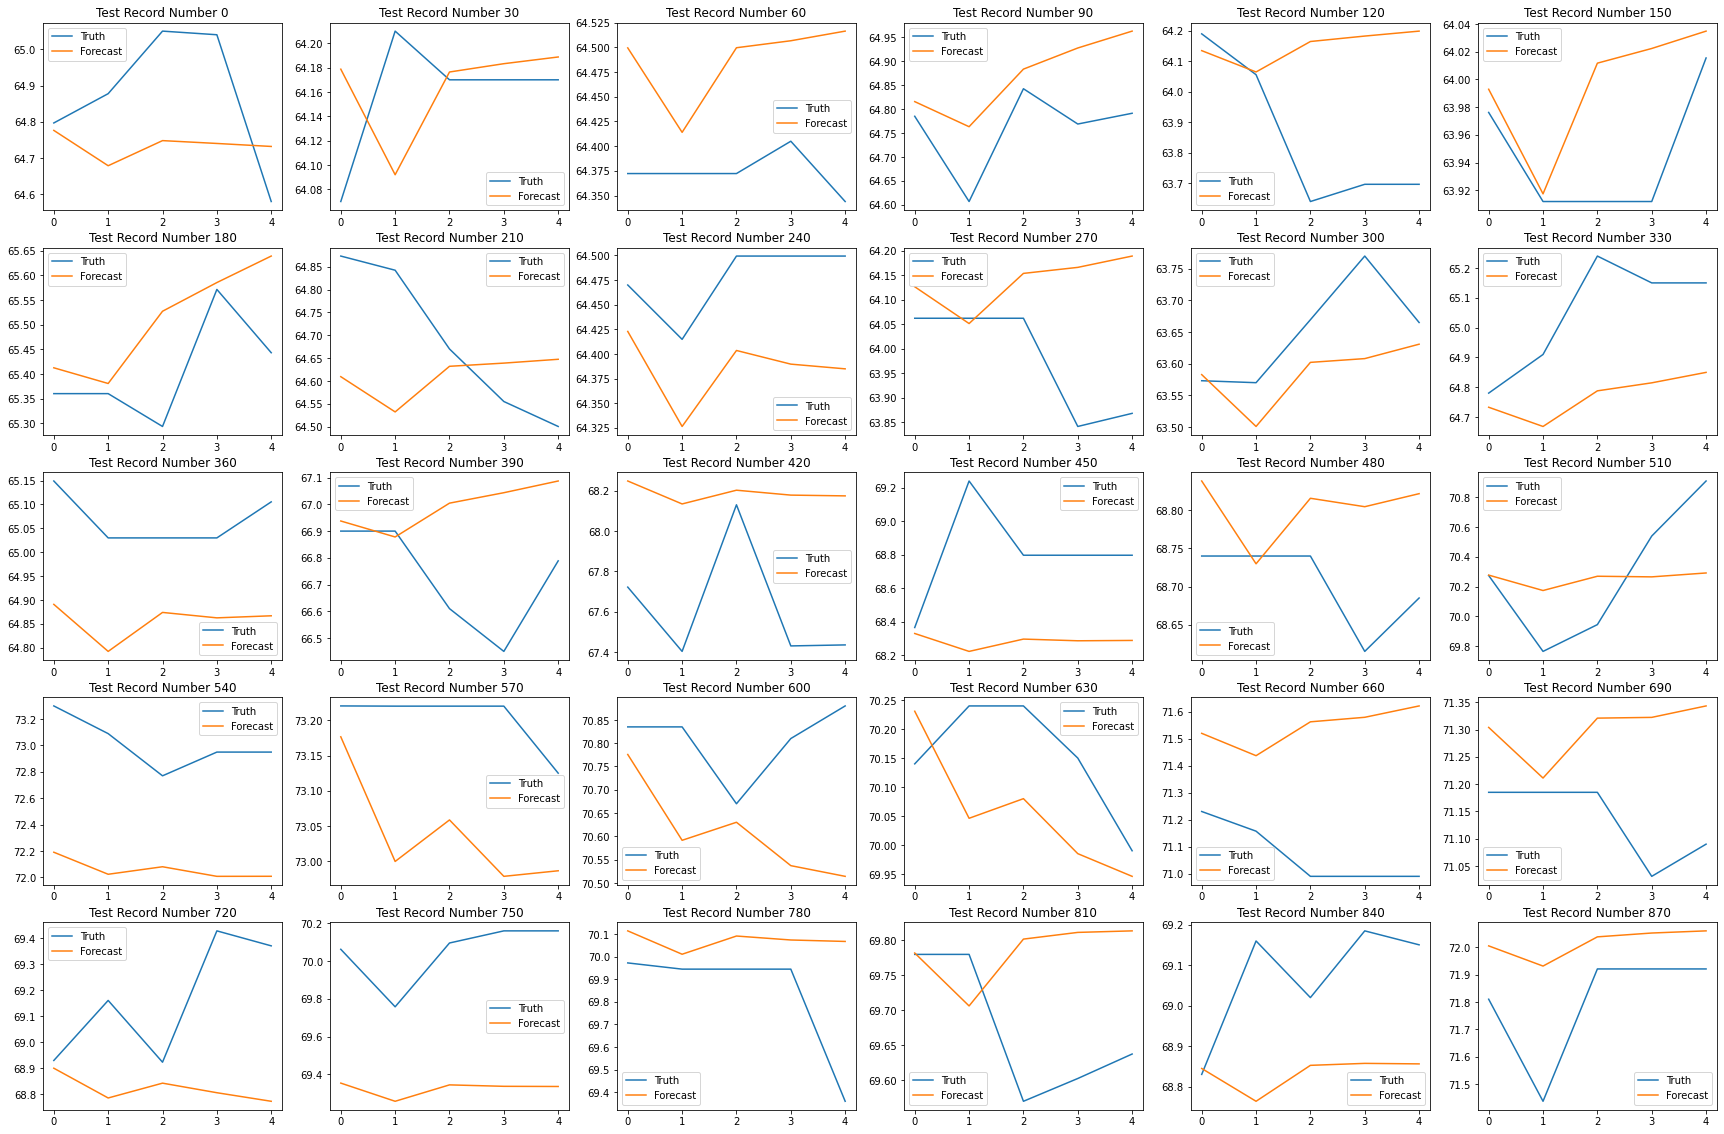

In [ ]:
plt.figure(figsize=(30,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title('Test Record Number '+str(30*i))
    plt.plot(Truth[30*i],label='Truth')
    plt.plot(Predictions[30*i],label='Forecast')
    plt.legend()

In [ ]:
Predictions.shape

(899, 5)

In [ ]:
Truth.reshape(Predictions.shape)

array([[64.79669952, 64.87750244, 65.05000305, 65.04000092, 64.58000183],
       [64.87750244, 65.05000305, 65.04000092, 64.58000183, 64.58000183],
       [65.05000305, 65.04000092, 64.58000183, 64.58000183, 64.58000183],
       ...,
       [71.02069855, 71.74909973, 71.70999908, 71.54250336, 71.71749878],
       [71.74909973, 71.70999908, 71.54250336, 71.71749878, 71.71749878],
       [71.70999908, 71.54250336, 71.71749878, 71.71749878, 71.71749878]])

In [ ]:
((y_val_r>=0).ravel()==(Y_scaler.inverse_transform(lstm_model.predict(X_val))>0).ravel()).sum()

29/29 [==============================] - 1s 28ms/step


2328

In [ ]:
Y_scaler.inverse_transform(lstm_model.predict(X_val))>0

29/29 [==============================] - 0s 16ms/step


array([[False, False,  True, False, False],
       [False, False,  True, False, False],
       [False, False,  True, False, False],
       ...,
       [False, False,  True, False, False],
       [False, False,  True, False, False],
       [False, False,  True, False, False]])